In [1]:
import numpy as np

In [2]:
import os
mingw_path = 'C:\Program Files\mingw-w64\x86_64-6.3.0-posix-seh-rt_v5-rev2\mingw64\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [3]:
import tensorflow as tf
import sklearn
import xgboost as xgb

del train_y
    del train_x
del test_x
del test_y

In [4]:
import pickle
train_x,train_y = pickle.load(open('datauint8.pkl','rb'))

In [5]:
len(train_x),len(train_y)

(10000, 10000)

In [6]:
from sklearn.cross_validation import train_test_split
train_x,test_x,train_y,test_y = train_test_split(train_x,train_y,test_size=0.2,random_state=1120)

In [7]:
# do not use this now, will cause future shuffle slow
#train_x = np.asarray(train_x,dtype=np.uint8)
#test_x = np.asarray(test_x,dtype=np.uint8)

In [8]:
len(train_x),len(train_y),len(test_x),len(test_y)

(8000, 8000, 2000, 2000)

In [9]:
import pickle
#pickle.dump((train_x,train_y),open('data.pkl','wb'))

In [10]:
import sys
sys.getsizeof(train_x[0]) * 10000

960000

In [11]:
len(train_x),len(test_x)

(8000, 2000)

In [12]:
train_x = np.asarray(train_x,dtype=np.uint8)

In [13]:
train_x.shape

(8000, 612060)

In [14]:
train_x = train_x.reshape((-1,60,101,101))

In [15]:
train_x.shape

(8000, 60, 101, 101)

In [16]:
#train_x = [i[59].reshape(101,101,1) for i in train_x]

In [17]:
#train_x = np.asarray(train_x,dtype=np.uint8)
#train_x.shape

In [18]:
test_x = np.asarray(test_x,dtype=np.uint8)
test_x = test_x.reshape((-1,60,101,101))
#test_x = [i[59].reshape(101,101,1) for i in test_x]

In [19]:
#test_x = np.asarray(test_x,dtype=np.uint8)
test_x.shape

(2000, 60, 101, 101)

In [20]:
len(test_y)

2000

In [21]:
len(train_x),len(train_y),len(test_x),len(test_y)

(8000, 8000, 2000, 2000)

In [22]:
train_x.shape,len(train_y)

((8000, 60, 101, 101), 8000)

In [23]:
train_x = np.transpose(train_x,axes=[0,2,3,1])

In [24]:
test_x = np.transpose(test_x,axes=[0,2,3,1])

In [25]:
train_x.shape,test_x.shape

((8000, 101, 101, 60), (2000, 101, 101, 60))

# keras logistic model

In [27]:
# set a big learning rate,and early stopping after val_loss stop decreasing 3 rounds

from keras.models import Sequential, load_model
from keras import backend, regularizers
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.pooling import MaxPooling2D
from keras.layers.convolutional_recurrent import ConvLSTM2D
import keras.layers.recurrent as recurrent_unit
from keras.layers.convolutional import Conv2D
from keras.layers.wrappers import TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn import metrics, ensemble
from sklearn.externals import joblib
from keras import optimizers
from keras.callbacks import ModelCheckpoint

def FuckModel(input_shape, rweight=0.1):
    fuckingmodel = Sequential()
    fuckingmodel.add(Conv2D(6, (5, 5), padding='same', activation='relu', input_shape=input_shape))
    fuckingmodel.add(MaxPooling2D(pool_size=(2, 2)))
    fuckingmodel.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
    fuckingmodel.add(MaxPooling2D(pool_size=(2, 2)))
    
    fuckingmodel.add(Flatten())
    fuckingmodel.add(Dense(16*26*26, kernel_regularizer=regularizers.l2(rweight), activation='relu'))
    fuckingmodel.add(Dense(512, kernel_regularizer=regularizers.l2(rweight), activation='relu'))
    fuckingmodel.add(Dropout(0.4))
    fuckingmodel.add(Dense(1))
    fuckingmodel.compile(loss='mean_squared_error',
                      metrics=['mean_squared_error'],
                      optimizer='adadelta')
    return fuckingmodel

model = FuckModel((101,101,60))
#checkpoint = ModelCheckpoint(filepath='models/keras_conv_reg_checkpoint-{epoch:02d}-{val_loss:.2f}.hdf5',save_best_only=True)
checkpoint = ModelCheckpoint(filepath='models/keras_conv_reg_checkpoint.hdf5',save_best_only=True)

model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=10000,batch_size=64,callbacks=[checkpoint])

Using TensorFlow backend.


Train on 8000 samples, validate on 2000 samples
Epoch 1/10000
8000/8000 [==============================] - 105s - loss: 115037.5976 - mean_squared_error: 113983.9013 - val_loss: 1240.1870 - val_mean_squared_error: 243.2327
Epoch 2/10000
8000/8000 [==============================] - 94s - loss: 1191.3272 - mean_squared_error: 292.2041 - val_loss: 1045.2369 - val_mean_squared_error: 269.4739
Epoch 3/10000
8000/8000 [==============================] - 96s - loss: 944.8637 - mean_squared_error: 309.6236 - val_loss: 832.8390 - val_mean_squared_error: 325.0924
Epoch 4/10000
8000/8000 [==============================] - 97s - loss: 643.3969 - mean_squared_error: 250.1238 - val_loss: 529.6626 - val_mean_squared_error: 265.0042
Epoch 5/10000
8000/8000 [==============================] - 97s - loss: 403.4995 - mean_squared_error: 230.0338 - val_loss: 335.6208 - val_mean_squared_error: 226.1757
Epoch 6/10000
8000/8000 [==============================] - 96s - loss: 263.2493 - mean_squared_error: 183.7

KeyboardInterrupt: 

In [30]:
del model

In [31]:
# fine tuning using sgd
from keras.models import Sequential, load_model
from keras import backend, regularizers
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.pooling import MaxPooling2D
from keras.layers.convolutional_recurrent import ConvLSTM2D
import keras.layers.recurrent as recurrent_unit
from keras.layers.convolutional import Conv2D
from keras.layers.wrappers import TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn import metrics, ensemble
from sklearn.externals import joblib
from keras import optimizers
from keras.callbacks import ModelCheckpoint
sgd = optimizers.SGD(lr=0.0000001, decay=1e-6, momentum=0.9, nesterov=True)

def FuckModel(input_shape, rweight=0.1):
    fuckingmodel = Sequential()
    fuckingmodel.add(Conv2D(6, (5, 5), padding='same', activation='relu', input_shape=input_shape))
    fuckingmodel.add(MaxPooling2D(pool_size=(2, 2)))
    fuckingmodel.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
    fuckingmodel.add(MaxPooling2D(pool_size=(2, 2)))
    
    fuckingmodel.add(Flatten())
    fuckingmodel.add(Dense(16*26*26, kernel_regularizer=regularizers.l2(rweight), activation='relu'))
    fuckingmodel.add(Dense(512, kernel_regularizer=regularizers.l2(rweight), activation='relu'))
    fuckingmodel.add(Dropout(0.4))
    fuckingmodel.add(Dense(1))
    fuckingmodel.compile(loss='mean_squared_error',
                      metrics=['mean_squared_error'],
                      optimizer=sgd)
    return fuckingmodel

model = FuckModel((101,101,60))
model.load_weights('models/keras_conv_reg_checkpoint.hdf5')

In [32]:
#checkpoint = ModelCheckpoint(filepath='models/keras_conv_reg_checkpoint-{epoch:02d}-{val_loss:.2f}.hdf5',save_best_only=True)
checkpoint = ModelCheckpoint(filepath='models/keras_conv_reg_sgd_checkpoint.hdf5',save_best_only=True)

model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=10000,batch_size=64,callbacks=[checkpoint])

Train on 8000 samples, validate on 2000 samples
Epoch 1/10000
8000/8000 [==============================] - 94s - loss: 32.1726 - mean_squared_error: 17.8947 - val_loss: 162.6673 - val_mean_squared_error: 148.3902
Epoch 2/10000
8000/8000 [==============================] - 90s - loss: 30.0185 - mean_squared_error: 15.7419 - val_loss: 162.1322 - val_mean_squared_error: 147.8562
Epoch 3/10000
8000/8000 [==============================] - 89s - loss: 29.7050 - mean_squared_error: 15.4294 - val_loss: 161.9334 - val_mean_squared_error: 147.6583
Epoch 4/10000
8000/8000 [==============================] - 90s - loss: 29.1440 - mean_squared_error: 14.8692 - val_loss: 161.7692 - val_mean_squared_error: 147.4949
Epoch 5/10000
8000/8000 [==============================] - 85s - loss: 29.1663 - mean_squared_error: 14.8924 - val_loss: 161.8465 - val_mean_squared_error: 147.5732
Epoch 6/10000
8000/8000 [==============================] - 91s - loss: 29.0106 - mean_squared_error: 14.7376 - val_loss: 161.41

KeyboardInterrupt: 

In [35]:
testpredict = model.predict(test_x)

In [46]:
np.sqrt(np.average(np.square(testpredict.reshape(-1) - np.asarray(test_y))))

12.124450710984904

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000270F4A5EEB8>]], dtype=object)

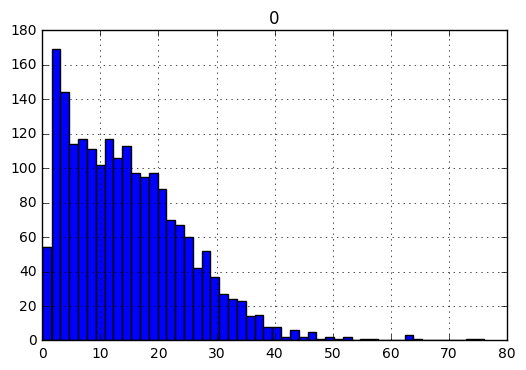

In [47]:
%matplotlib inline
import pandas as pd
pd.DataFrame(testpredict).hist(bins=50)

In [40]:
np.average(testpredict)

14.775969

In [56]:
denselayer = model.get_layer("Dense",1)
denselayer.get_weights()[0].shape

(5, 5, 60, 6)

In [57]:
del train_x
del train_y
del test_x
del test_y

In [58]:

with open('onlinedata.plk','rb') as fhdl:
    predict_x = pickle.load(fhdl)

In [60]:
predict_x = np.asarray(predict_x,dtype=np.uint8)
predict_x = predict_x.reshape((-1,60,101,101))
predict_x = np.transpose(predict_x,axes=[0,2,3,1])

In [61]:
predictresult = model.predict(predict_x)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000270F5E96B38>]], dtype=object)

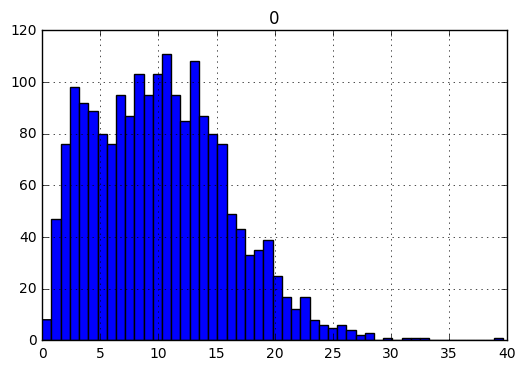

In [63]:
pd.DataFrame(predictresult).hist(bins=50)

In [65]:
np.average(predictresult)

10.226006

In [76]:
denselayer = model.get_layer("Dense",1)
denselayer.get_weights()[0].shape

(5, 5, 60, 6)

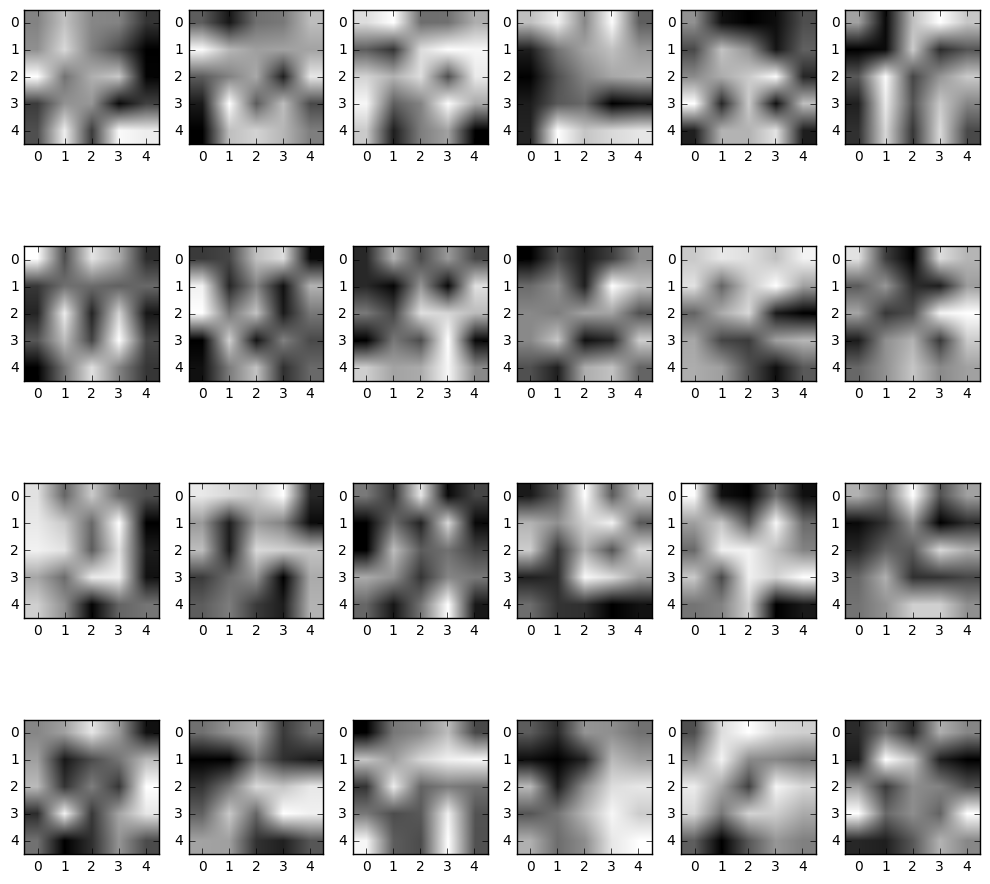

In [78]:
# find out what cnn sees
from matplotlib import pyplot as plt
%matplotlib inline
denselayer = model.get_layer("Dense",1)
plt.figure(figsize=(10,10))
f,axarr = plt.subplots(4,6,figsize=(10,10))
for j in range(4):
    for i in range(6):
        #plt.subplot(340 + j * 4 + i + 1)
        axarr[j][i].imshow(denselayer.get_weights()[0][:,:,i,j],cmap='gray')
f.tight_layout()
plt.show()

In [90]:
model.get_layer("Dense",3).get_weights()[0].shape

(5, 5, 6, 16)

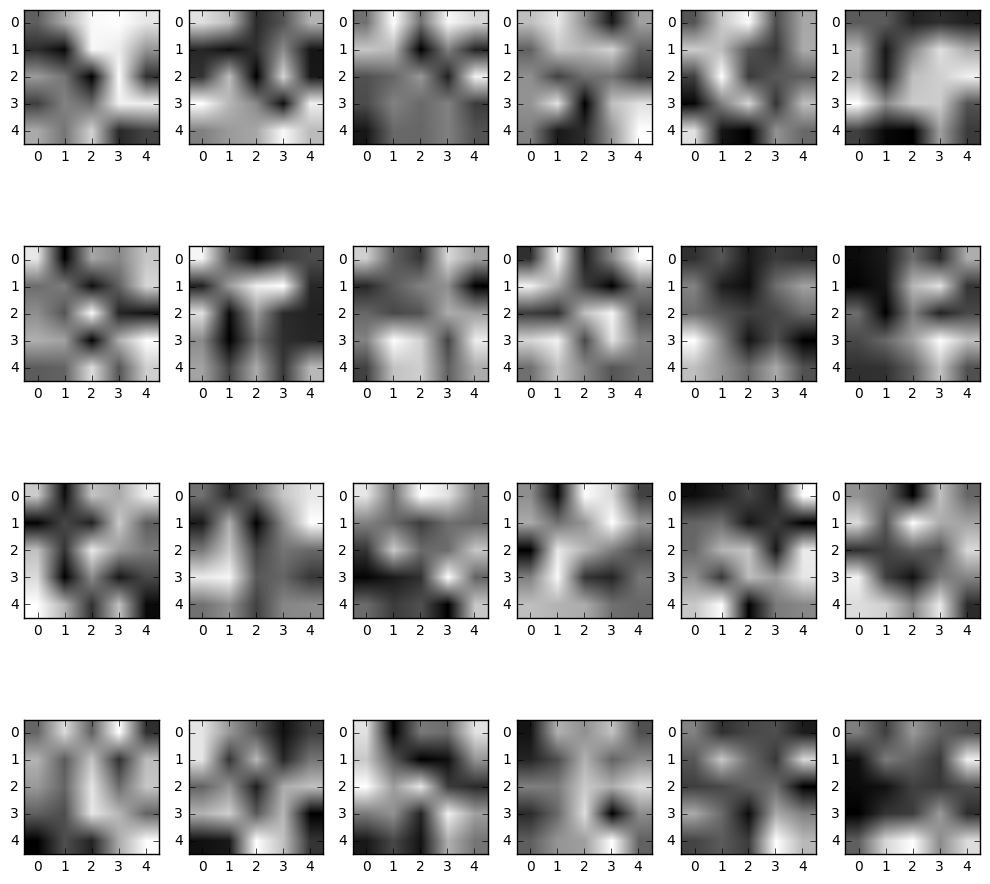

In [89]:
# find out what cnn sees
from matplotlib import pyplot as plt
%matplotlib inline
denselayer = model.get_layer("Dense",3)
plt.figure(figsize=(10,10))
f,axarr = plt.subplots(4,6,figsize=(10,10))
for j in range(4):
    for i in range(6):
        #plt.subplot(340 + j * 4 + i + 1)
        axarr[j][i].imshow(denselayer.get_weights()[0][:,:,i,j],cmap='gray')
f.tight_layout()
plt.show()

In [68]:
with open('answers/4_25_lenet_len8.csv','w') as whdl:
    for one in predictresult:
        whdl.write("%s\n" % one[0])

In [70]:
train_x[0].reshape([15,4,101,101])[0][0]
from matplotlib import pyplot as plt
%matplotlib inline
index = 1000
index += 1

print (
    [float(sum(train_x[index].reshape([15,4,101,101])[14][i].reshape(-1) == 0)) / (101*101) for i in range(4)]
)
print (
    [np.average(train_x[index].reshape([15,4,101,101])[14][i]).reshape(-1) for i in range(4)]
)
print (
    [np.std(train_x[index].reshape([15,4,101,101])[14][i]).reshape(-1) for i in range(4)]
)
plt.figure(figsize=(10,10))
f,axarr = plt.subplots(3,4,figsize=(10,10))
for j in range(5):
    for i in range(4):
        #plt.subplot(340 + j * 4 + i + 1)
        axarr[j][i].imshow(train_x[index].reshape([15,4,101,101])[14-2*j][i],cmap='gray')
f.tight_layout()
plt.show()
print (train_y[index])

NameError: name 'train_x' is not defined